In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import itertools
import re
import matplotlib.pyplot as plt

In [2]:
import base64
import requests

In [3]:
header_url = 'https://raw.githubusercontent.com/Susiesyyyy/Capstone_Disney_AP_Grouping/main/AP%20Visitation%20header_by%20day.txt'
visitation_url = 'https://raw.githubusercontent.com/Susiesyyyy/Capstone_Disney_AP_Grouping/main/AP%20Visitation_20201101_20211031_by%20day.csv'

In [4]:
req = requests.get(header_url)
req = req.text

In [5]:
header = req.split("\r")
header = header[0].split("\t")

In [6]:
visit_df = pd.read_csv(visitation_url, sep=',', header=None)
visit_df.columns = header
visit_df.head()

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,use_time
0,5361,Gold,Adult,<1K,0,2020-11-06 12:01:37.917
1,6604,Gold,Adult,>1K,0,2020-12-11 17:05:15.397
2,6604,Gold,Adult,>1K,0,2021-01-03 10:44:05.687
3,6604,Gold,Adult,>1K,0,2021-01-13 11:47:10.623
4,6604,Gold,Adult,>1K,0,2021-01-28 10:22:03.467


In [7]:
visit_df.shape

(92564, 6)

In [8]:
visit_time = visit_df[['source_id','use_time']]

In [ ]:
# visit_time['year1'] = visit_time['year'].astype(str)
# visit_time['month1'] = visit_time['month'].astype(str)
# visit_time['time'] = visit_time['year1'] + visit_time['month1']
# visit_time = visit_time.drop(['year','year1','month','month1'],axis=1)

In [9]:
visit_time['use_hour'] = visit_time['use_time'].apply(lambda x: x[:13])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
visit_time

,source_id,use_time,use_hour
0,5361,2020-11-06 12:01:37.917,2020-11-06 12
1,6604,2020-12-11 17:05:15.397,2020-12-11 17
2,6604,2021-01-03 10:44:05.687,2021-01-03 10
3,6604,2021-01-13 11:47:10.623,2021-01-13 11
4,6604,2021-01-28 10:22:03.467,2021-01-28 10
...,...,...,...
92559,354954,2020-11-01 11:50:25.353,2020-11-01 11
92560,354954,2021-02-21 14:15:52.797,2021-02-21 14
92561,354954,2021-06-20 14:54:30.807,2021-06-20 14
92562,354954,2021-08-27 15:11:45.997,2021-08-27 15


In [ ]:
# test_url = 'https://raw.githubusercontent.com/Susiesyyyy/Capstone_Disney_AP_Grouping/main/new_child_final_list.csv'
# testing_data = pd.read_csv(test_url)

In [ ]:
# testing_data

In [11]:
wechat_group = 'https://raw.githubusercontent.com/Susiesyyyy/Capstone_Disney_AP_Grouping/main/wechat_group.csv'
testing_data = pd.read_csv(wechat_group,header=None)

In [12]:
testing_data.head()

,0,1,2,3
0,259183,53500,NaN,NaN
1,251084,251079,NaN,NaN
2,284757,277972,NaN,NaN
3,272049,272048,NaN,NaN
4,299998,299999,NaN,NaN


In [13]:
testing_data.shape

(568, 4)

In [14]:
visitation_id = list(np.unique(visit_time.source_id))
testing_id = list(np.unique(testing_data))

In [15]:
overlap_id = [x for x in visitation_id + testing_id if x in visitation_id and x in testing_id]
overlap_array = np.unique(np.array(overlap_id))
overlap_list = list(overlap_array)

In [16]:
overlap_list

[18919.0,
 18920.0,
 26152.0,
 26154.0,
 27400.0,
 27401.0,
 27918.0,
 38383.0,
 38384.0,
 38714.0,
 38879.0,
 38880.0,
 39557.0,
 39674.0,
 39720.0,
 39727.0,
 39986.0,
 39989.0,
 40171.0,
 40173.0,
 40261.0,
 40284.0,
 40285.0,
 40290.0,
 40632.0,
 40633.0,
 40634.0,
 40683.0,
 40684.0,
 41032.0,
 41033.0,
 41308.0,
 41311.0,
 41725.0,
 41727.0,
 42084.0,
 42085.0,
 42388.0,
 42389.0,
 42739.0,
 43757.0,
 43803.0,
 43804.0,
 44015.0,
 44095.0,
 44097.0,
 44347.0,
 44484.0,
 44485.0,
 44704.0,
 44705.0,
 44707.0,
 44794.0,
 44800.0,
 44874.0,
 44876.0,
 45158.0,
 45159.0,
 45187.0,
 45189.0,
 45294.0,
 45901.0,
 45902.0,
 46578.0,
 46580.0,
 47278.0,
 47279.0,
 47329.0,
 47365.0,
 47366.0,
 47479.0,
 47613.0,
 47615.0,
 48414.0,
 48416.0,
 49794.0,
 50003.0,
 50004.0,
 50005.0,
 50007.0,
 50395.0,
 50396.0,
 50434.0,
 50435.0,
 50603.0,
 50604.0,
 50947.0,
 50948.0,
 50981.0,
 51207.0,
 51208.0,
 51393.0,
 51394.0,
 52719.0,
 52758.0,
 53211.0,
 53239.0,
 53240.0,
 53337.0,
 53338.0,


In [17]:
len(overlap_list)

1167

In [18]:
overlap_df = visit_time.loc[visit_time['source_id'].isin(overlap_list),]

In [19]:
overlap_df

,source_id,use_time,use_hour
96,18919,2020-11-01 13:50:38.513,2020-11-01 13
97,18919,2021-01-28 14:47:41.943,2021-01-28 14
98,18919,2021-02-07 15:41:50.020,2021-02-07 15
99,18919,2021-08-30 13:38:26.233,2021-08-30 13
100,18919,2021-09-03 17:46:51.713,2021-09-03 17
...,...,...,...
92559,354954,2020-11-01 11:50:25.353,2020-11-01 11
92560,354954,2021-02-21 14:15:52.797,2021-02-21 14
92561,354954,2021-06-20 14:54:30.807,2021-06-20 14
92562,354954,2021-08-27 15:11:45.997,2021-08-27 15


In [20]:
same_hour_id = overlap_df.groupby('use_hour')['source_id'].apply(lambda x: list(np.unique(x)))

In [21]:
same_hour_id = same_hour_id.to_frame().reset_index()

In [22]:
same_hour_id

,use_hour,source_id
0,2020-11-01 08,"[248016, 248017]"
1,2020-11-01 09,"[250398, 257422, 257435, 258100, 259069, 354533]"
2,2020-11-01 10,"[250396, 250530, 250534, 255246, 255247, 25722..."
3,2020-11-01 11,"[44794, 44800, 257288, 257289, 258228, 354627,..."
4,2020-11-01 12,"[43803, 43804, 45901, 45902, 47365, 47366, 247..."
...,...,...
2214,2021-10-30 18,"[286167, 286168]"
2215,2021-10-31 07,"[59425, 278560, 278562, 290935]"
2216,2021-10-31 08,"[262990, 262993, 290936]"
2217,2021-10-31 09,"[57535, 57536]"


In [23]:
from itertools import combinations
G = nx.Graph()

for i in range(len(same_hour_id)):
    for j in range(len(same_hour_id['source_id'][i])):
        if str(same_hour_id['source_id'][i][j]) not in G.nodes():
            G.add_node(str(same_hour_id['source_id'][i][j]),weight = 1)
        else:
            G.nodes[str(same_hour_id['source_id'][i][j])]['weight'] += 1
            
    edge_combinations = list(combinations(same_hour_id['source_id'][i],2))
    for combination in edge_combinations:
        if (str(combination[0]),str(combination[1])) not in G.edges():
            G.add_edge(str(combination[0]),str(combination[1]),weight=1)
        else:
            G.edges[str(combination[0]),str(combination[1])]['weight'] += 1
            
sorted_same_month_group = sorted(G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)

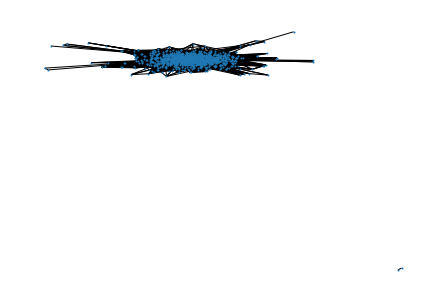

In [24]:
nx.draw(G,node_size=1)

In [25]:
groups = []

for node1 in G.nodes():
    node1_weight = G.nodes[node1]['weight']
    
    if len(G.edges(node1,data=True)) > 0:
    
        max_value = sorted(G.edges(node1,data=True),key=lambda x: x[2]['weight'],reverse=True)[0][-1]
        max_value = [int(value) for key, value in max_value.items()][0]
    
        if max_value > 1:
            node2 = sorted(G.edges(node1,data=True),key= lambda x: x[2]['weight'],reverse=True)[0][1]
            node2_weight = G.nodes[node2]['weight']
    
            group_weight = sorted(G.edges(node1,data=True),key= lambda x: x[2]['weight'],reverse=True)[0][-1]
            group_weight = [int(value) for key, value in group_weight.items()][0]
    
            node1_neighbor = []
            node2_neighbor = []

            for nbr in G.neighbors(node1):
                threshold_weight = 90/100*node1_weight
                if G.edges[node1, nbr]['weight'] > threshold_weight:
                    if nbr != node2:
                        node1_neighbor.append(nbr)

            for nbr in G.neighbors(node2):
                threshold_weight = 90/100*node2_weight
                if G.edges[node2, nbr]['weight'] > threshold_weight: 
                    if nbr != node1:
                        node2_neighbor.append(nbr)

            group_neighbor = node1_neighbor+node2_neighbor
            group_neighbor = list(set(group_neighbor))            

            current_group = []
            current_group.append(node1)
            current_group.append(node2)
            current_group += group_neighbor

            if current_group not in groups:
                groups.append(current_group)
    

In [26]:
unique_groups = [list(x) for x in set(frozenset(i) for i in [set(i) for i in groups])]
wechat_group = [testing_data.loc[i] for i in range(testing_data.shape[0])]

In [27]:
for group in wechat_group:
  group.dropna(inplace = True)
wechat_group_list = [list(n) for n in wechat_group]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [28]:
unique_groups_int = []
for group in unique_groups:
  group = [int(x) for x in group]
  unique_groups_int.append(group)

In [29]:
group_set = set([frozenset(x) for x in unique_groups_int])
wechat_set = set([frozenset(x) for x in wechat_group])
difference_set = group_set.difference(wechat_set)
difference_set2 = wechat_set.difference(group_set)
print(len(group_set), len(wechat_set), len(difference_set), len(difference_set2))
print(1 - len(difference_set2)/len(wechat_set))

580 568 44 32
0.9436619718309859


In [32]:
#group_set

In [33]:
#wechat_set

In [34]:
#difference_set

In [35]:
accuracy = {}
for group in unique_groups:
  group = [int(x) for x in group]
  similarity_count = []
  set1 = set(group)
  for group2 in wechat_group_list:
    set2 = set(group2)
    difference_set = set2.difference(set1)
    similarity_count.append(1 - (len(difference_set)/len(set2)))
  accuracy[str(group)] = [max(similarity_count), str(list(wechat_group[similarity_count.index(max(similarity_count))]))]

In [36]:
partial_correct = []
for value in list(accuracy.values()):
  if value[0] < 1:
    partial_correct.append(value)

In [37]:
sum = 0
for value in list(accuracy.values()):
  sum += value[0]
avg_accuracy = sum/len(accuracy)
print(avg_accuracy)

0.979454022988506


In [38]:
accuracy

{'[186557, 186559]': [1.0, '[186557.0, 186559.0]'],
 '[187027, 60325]': [1.0, '[187027.0, 60325.0]'],
 '[187361, 187363, 187362]': [1.0, '[187363.0, 187361.0, 187362.0]'],
 '[187424, 63118]': [1.0, '[63118.0, 187424.0]'],
 '[187686, 187687]': [1.0, '[187687.0, 187686.0]'],
 '[188750, 188751]': [1.0, '[188750.0, 188751.0]'],
 '[18919, 18920]': [1.0, '[18920.0, 18919.0]'],
 '[247703, 42084]': [0.6666666666666667, '[42085.0, 42084.0, 247703.0]'],
 '[248017, 248016]': [0.6666666666666667, '[248018.0, 248016.0, 248017.0]'],
 '[248018, 248017, 248016]': [1.0, '[248018.0, 248016.0, 248017.0]'],
 '[248281, 248279]': [1.0, '[248279.0, 248281.0]'],
 '[249634, 249635]': [1.0, '[249634.0, 249635.0]'],
 '[249678, 249676]': [1.0, '[249676.0, 249678.0]'],
 '[249766, 251119]': [1.0, '[249766.0, 251119.0]'],
 '[249806, 249807]': [1.0, '[249806.0, 249807.0]'],
 '[250206, 250207]': [1.0, '[250206.0, 250207.0]'],
 '[250396, 250398]': [1.0, '[250396.0, 250398.0]'],
 '[250479, 250476]': [1.0, '[250479.0, 25

In [ ]:
for group in unique_groups:
  if '18919' in group:
    print(group)

['18920', '18919']


In [ ]:
for group in wechat_group_list:
  if 274410 in group:
    print(group)

[274410.0, 274409.0]


In [ ]:
wechat_group_list

In [ ]:
overlap_id

In [ ]:
print(len(groups),len(unique_groups))

1139 581


In [ ]:
group_df = pd.DataFrame(unique_groups)

In [ ]:
group_df

,0,1,2,3
0,294901,294900,None,None
1,53338,53337,None,None
2,52719,52758,None,None
3,293879,293878,None,None
4,252922,252921,None,None
...,...,...,...,...
576,267448,267449,None,None
577,270360,270412,None,None
578,285014,285015,None,None
579,274033,274032,None,None


In [ ]:
visit_time

In [ ]:
all_hour_id = visit_time.groupby('use_hour')['source_id'].apply(lambda x: list(np.unique(x)))

In [ ]:
all_hour_id

In [ ]:
all_hour_id = all_hour_id.to_frame().reset_index()

In [ ]:
all_hour_id

In [ ]:
explode_id = all_hour_id.explode('source_id', ignore_index = True)

In [ ]:
network_id = explode_id.source_id

In [ ]:
wechat_df = pd.DataFrame(wechat_group)
wechat_df = wechat_df.melt()

In [ ]:
wechat_df.dropna(inplace = True)

In [ ]:
wechat_id = wechat_df.value

In [ ]:
wechat_id_set = set(wechat_id)
network_id_set = set(network_id)

In [ ]:
for id in network_id_set:
  for group in wechat_group:
    if id in group:
      print(id, group)
    

In [ ]:
network_id_set.intersection(wechat_id_set)

9901

In [ ]:
from itertools import combinations
G1 = nx.Graph()

for i in range(len(all_hour_id)):
    for j in range(len(all_hour_id['source_id'][i])):
        if str(all_hour_id['source_id'][i][j]) not in G1.nodes():
            G1.add_node(str(all_hour_id['source_id'][i][j]),weight = 1)
        else:
            G1.nodes[str(all_hour_id['source_id'][i][j])]['weight'] += 1
            
    edge_combinations = list(combinations(all_hour_id['source_id'][i],2))
    for combination in edge_combinations:
        if (str(combination[0]),str(combination[1])) not in G1.edges():
            G1.add_edge(str(combination[0]),str(combination[1]),weight=1)
        else:
            G1.edges[str(combination[0]),str(combination[1])]['weight'] += 1
            
sorted_same_hour_group_all = sorted(G1.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)

In [ ]:
groups_all = []

for node1 in G1.nodes():
    node1_weight = G1.nodes[node1]['weight']
    
    if len(G1.edges(node1,data=True)) > 0:
    
        max_value = sorted(G1.edges(node1,data=True),key=lambda x: x[2]['weight'],reverse=True)[0][-1]
        max_value = [int(value) for key, value in max_value.items()][0]
    
        if max_value > 1:
            node2 = sorted(G1.edges(node1,data=True),key= lambda x: x[2]['weight'],reverse=True)[0][1]
            node2_weight = G1.nodes[node2]['weight']
    
            group_weight = sorted(G1.edges(node1,data=True),key= lambda x: x[2]['weight'],reverse=True)[0][-1]
            group_weight = [int(value) for key, value in group_weight.items()][0]
    
            node1_neighbor = []
            node2_neighbor = []

            for nbr in G1.neighbors(node1):
                threshold_weight = 9/10*node1_weight
                if G1.edges[node1, nbr]['weight'] > threshold_weight:
                    if nbr != node2:
                        node1_neighbor.append(nbr)

            for nbr in G1.neighbors(node2):
                threshold_weight = 9/10*node2_weight
                if G1.edges[node2, nbr]['weight'] > threshold_weight: 
                    if nbr != node1:
                        node2_neighbor.append(nbr)

            group_neighbor = node1_neighbor+node2_neighbor
            group_neighbor = list(set(group_neighbor))            

            current_group = []
            current_group.append(node1)
            current_group.append(node2)
            current_group += group_neighbor

            if current_group not in groups:
                groups_all.append(current_group)
    
groups_all

[['42865', '41413'],
 ['47048', '267478'],
 ['249681', '263115'],
 ['249902', '278615'],
 ['45638', '249792'],
 ['247710', '249792'],
 ['249792', '266675'],
 ['250315', '250316'],
 ['250316', '250315'],
 ['252352', '249792'],
 ['254048', '247710', '249792', '255319'],
 ['254285', '277446'],
 ['255319', '266675'],
 ['255754', '249718'],
 ['255757', '255319'],
 ['255773', '45638'],
 ['256584', '256588'],
 ['256588', '256584'],
 ['256989', '249792', '258104', '252352'],
 ['257059', '45638'],
 ['257136', '270225'],
 ['257177', '258104'],
 ['257232', '249792'],
 ['257335', '249792'],
 ['257952', '255379'],
 ['258104', '249792'],
 ['258158', '249792'],
 ['258187', '247710'],
 ['258256', '255319'],
 ['258286', '266675'],
 ['258353', '255319'],
 ['258468', '249792'],
 ['258493', '268935'],
 ['354868', '49040', '49041'],
 ['38482', '293804', '293805'],
 ['40240', '283310'],
 ['247740', '276070'],
 ['249052', '247740'],
 ['249188', '249052'],
 ['249367', '258148'],
 ['249876', '255142'],
 ['2503

In [ ]:
unique_groups_all = [list(x) for x in set(frozenset(i) for i in [set(i) for i in groups_all])]
unique_groups_all

[['270293', '251232'],
 ['263453', '62051'],
 ['289222', '257066'],
 ['267615', '251865'],
 ['274654', '290664'],
 ['271955', '275712'],
 ['59685', '289302'],
 ['261899', '354803'],
 ['39080', '258053'],
 ['264586', '264585'],
 ['269243', '266072'],
 ['281567', '287652'],
 ['282033', '288150'],
 ['248305', '264748'],
 ['271894', '52573'],
 ['261139', '288529', '262729'],
 ['269876', '265207', '265206'],
 ['286679', '286678'],
 ['286129', '265217'],
 ['275299', '255379'],
 ['249792', '258158'],
 ['271732', '273254'],
 ['256584', '256588'],
 ['275608', '259555'],
 ['256321', '249792'],
 ['266897', '277473'],
 ['292639', '287479'],
 ['280082', '278947'],
 ['247605', '255231'],
 ['274267', '267915'],
 ['268776', '250476', '250475'],
 ['261835', '42733'],
 ['272147', '287777', '287776'],
 ['250961', '263830'],
 ['42479', '64512'],
 ['254007', '249334'],
 ['48154', '269803'],
 ['51908', '275318'],
 ['281498', '249792'],
 ['45831', '253786'],
 ['61633', '263265'],
 ['250396', '250398', '35492

In [ ]:
len(unique_groups_all)

6941

In [ ]:
for id in wechat_id_set:
  for group in unique_groups_all:
    if id in group:
      print(id, group)

In [ ]:
for group in wechat_group:
  group.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [ ]:
wechat_group_list = [list(n) for n in wechat_group]

In [ ]:
accuracy = {}
for group in unique_groups_all:
  similarity_count = []
  set1 = set(group)
  for group2 in wechat_group_list:
    set2 = set(group2)
    difference_set = set2.difference(set1)
    similarity_count.append(1 - len(difference_set)/len(set2))
  accuracy[str(group)] = [max(similarity_count), str(list(wechat_group[similarity_count.index(max(similarity_count))]))]

In [ ]:
for group in unique_groups_all:
  if 299010.0 in group:
    print(group)

In [ ]:
accuracy

In [ ]:
max(list(accuracy.values()))

[0.0, '[259183.0, 53500.0]']

In [ ]:
difference_set3 = wechat_set.difference(set(map(tuple, unique_groups_all)))

In [ ]:
len(difference_set3)

568

In [ ]:
len(wechat_set)

In [ ]:
len(wechat_group)

568